<a href="https://colab.research.google.com/github/mdsiam135/research/blob/main/DT_3labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Yearbook of Agricultural Statistics/train1.csv")


In [26]:
# Binning the target into 3 classes: Low, Medium, High
df['Production_Class'] = pd.qcut(df['Production (M.Ton)'], q=3, labels=['Low', 'Medium', 'High'])

In [31]:
# Encode categorical features
label_encoders = {}
for col in ['Crop', 'District']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [32]:
# Features and target
X = df.drop(columns=['Production (M.Ton)', 'Production_Class'])
y = df['Production_Class']

In [33]:
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Second split: 15% validation, 15% test from the 30%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)


In [34]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [35]:
# Validation Evaluation
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
val_macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Validation Macro F1 Score: {val_macro_f1:.4f}\n")


Validation Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.88      0.88       256
         Low       0.91      0.89      0.90       256
      Medium       0.77      0.79      0.78       256

    accuracy                           0.85       768
   macro avg       0.85      0.85      0.85       768
weighted avg       0.85      0.85      0.85       768

Validation Macro F1 Score: 0.8508



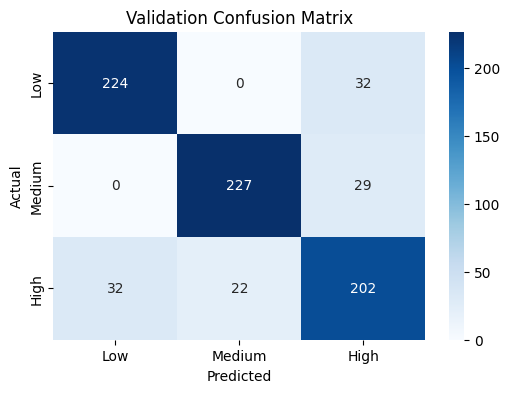

In [36]:
# Plot validation confusion matrix
y_val_pred = clf.predict(X_val)
val_cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(val_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
# === Test Evaluation ===

print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"Test Macro F1 Score: {test_macro_f1:.4f}")


Test Classification Report:
               precision    recall  f1-score   support

        High       0.89      0.90      0.90       256
         Low       0.90      0.89      0.90       256
      Medium       0.79      0.79      0.79       256

    accuracy                           0.86       768
   macro avg       0.86      0.86      0.86       768
weighted avg       0.86      0.86      0.86       768

Test Macro F1 Score: 0.8620


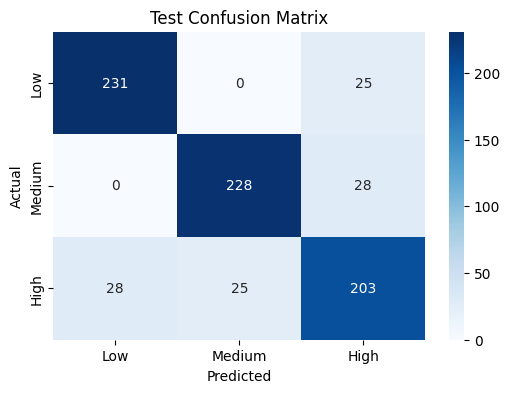

In [39]:
# Plot test confusion matrix
y_test_pred = clf.predict(X_test)
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()